<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week5_Day4_ExerciceXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp


In [3]:
## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv
import pandas as pd

# Lecture du CSV avec :
# - sep=',' (séparateur colonne)
# - quotechar='"' (pour gérer les guillemets autour des champs contenant des virgules)
# - thousands=',' (pour reconnaître les virgules comme séparateur de milliers)
d1 = pd.read_csv(
    "/content/air traffic.csv",
    sep=',',
    quotechar='"',
    thousands=','
)

print(d1.head())
print(d1.columns.tolist())
print(d1.dtypes)

   Year  Month   Dom_Pax  Int_Pax       Pax  Dom_Flt  Int_Flt     Flt  \
0  2003      1  43032450  4905830  47938280   785160    57667  842827   
1  2003      2  41166780  4245366  45412146   690351    51259  741610   
2  2003      3  49992700  5008613  55001313   797194    58926  856120   
3  2003      4  47033260  4345444  51378704   766260    55005  821265   
4  2003      5  49152352  4610834  53763186   789397    55265  844662   

    Dom_RPM   Int_RPM       RPM   Dom_ASM   Int_ASM       ASM  Dom_LF  Int_LF  \
0  36211422  12885980  49097402  56191300  17968572  74159872   64.44   71.71   
1  34148439  10715468  44863907  50088434  15587880  65676314   68.18   68.74   
2  41774564  12567068  54341633  57592901  17753174  75346075   72.53   70.79   
3  39465980  10370592  49836572  54639679  15528761  70168440   72.23   66.78   
4  41001934  11575026  52576960  55349897  15629821  70979718   74.08   74.06   

      LF  
0  66.20  
1  68.31  
2  72.12  
3  71.02  
4  74.07  
['Year',

# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [4]:
## TODO: Check the summary of the DataFrame to see its structure and data types.
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    int64  
 3   Int_Pax  249 non-null    int64  
 4   Pax      249 non-null    int64  
 5   Dom_Flt  249 non-null    int64  
 6   Int_Flt  249 non-null    int64  
 7   Flt      249 non-null    int64  
 8   Dom_RPM  249 non-null    int64  
 9   Int_RPM  249 non-null    int64  
 10  RPM      249 non-null    int64  
 11  Dom_ASM  249 non-null    int64  
 12  Int_ASM  249 non-null    int64  
 13  ASM      249 non-null    int64  
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(14)
memory usage: 33.2 KB


# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

In [5]:
## TODO: Explore the relationship between domestic passengers and domestic flights.


# Affiche un aperçu
print(d1[['Dom_Pax', 'Dom_Flt']].head())


    Dom_Pax  Dom_Flt
0  43032450   785160
1  41166780   690351
2  49992700   797194
3  47033260   766260
4  49152352   789397


In [6]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.
from scipy.stats import linregress
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = linregress(d1['Dom_Pax'], d1['Dom_Flt'])



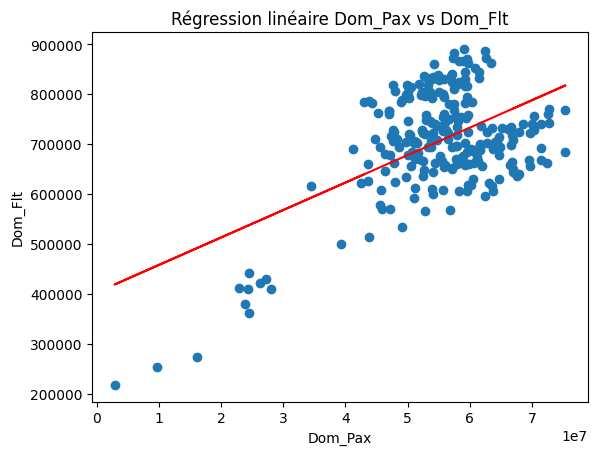

In [7]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.
plt.scatter(d1['Dom_Pax'], d1['Dom_Flt'])
plt.plot(d1['Dom_Pax'], intercept + slope*d1['Dom_Pax'], 'r')
plt.xlabel('Dom_Pax')
plt.ylabel('Dom_Flt')
plt.title('Régression linéaire Dom_Pax vs Dom_Flt')
plt.show()


In [8]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2:.3f}")

Slope: 0.005506132716515946
Intercept: 402758.72082950146
R-squared: 0.288


# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

In [9]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(d1['Dom_Pax'], d1['Dom_Flt'])

print(f"Slope (coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Predict the number of flights for 100 domestic passengers
dom_pax_to_predict = 100
predicted_flights = intercept + slope * dom_pax_to_predict
print(f"Predicted number of domestic flights for {dom_pax_to_predict} passengers: {predicted_flights:.2f}")


Slope (coefficient): 0.005506132716515946
Intercept: 402758.72082950146
P-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366
Predicted number of domestic flights for 100 passengers: 402759.27


# Linear Regression


Slope: 0.005330490453737316
Intercept: 25332.070850804426
Correlation coefficient (r): 0.8878303432839662
P-value: 3.143339712036262e-85
Standard error: 0.00017579555350470704
   Month     Predicted
0      1  25332.076181
1      2  25332.081512
2      3  25332.086842
3      4  25332.092173
4      5  25332.097503


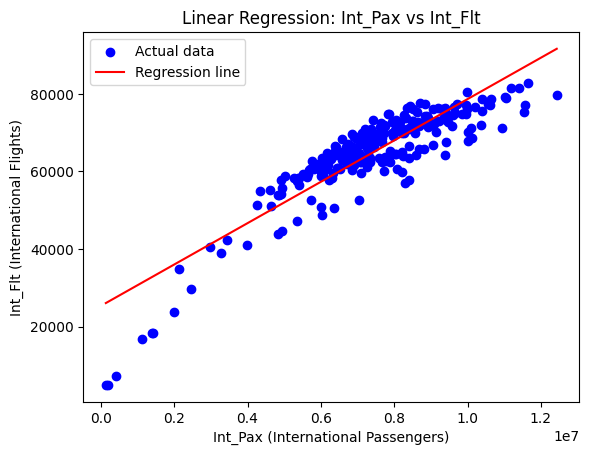

slope = 0.005330490453737316
intercept = 25332.070850804426
r² = 0.7882427184557251
p_value = 3.143339712036262e-85
std_err = 0.00017579555350470704


In [10]:
## TODO: Calculate linear regression parameters

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(d1['Int_Pax'], d1['Int_Flt'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation coefficient (r): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


## TODO:  Define the function for the linear model

def linear_model(x, slope, intercept):
    return slope * x + intercept

## TODO:  Apply the model to the 'Month' data
d1['Predicted'] = linear_model(d1['Month'], slope, intercept)
# To see the results
print(d1[['Month', 'Predicted']].head())

## TODO:  Plot the scatter plot and the regression line
# Labels and title
import matplotlib.pyplot as plt

# Scatter plot of Int_Pax vs Int_Flt
plt.scatter(d1['Int_Pax'], d1['Int_Flt'], color='blue', label='Actual data')

# Regression line: predicted Int_Flt from Int_Pax values (since model trained on Int_Pax -> Int_Flt)
# We'll generate predicted values along the range of Int_Pax to draw a smooth line

import numpy as np

# Create a sequence of Int_Pax values covering the observed range
x_vals = np.linspace(d1['Int_Pax'].min(), d1['Int_Pax'].max(), 100)
y_vals = linear_model(x_vals, slope, intercept)

plt.plot(x_vals, y_vals, color='red', label='Regression line')

# Labels and title
plt.xlabel('Int_Pax (International Passengers)')
plt.ylabel('Int_Flt (International Flights)')
plt.title('Linear Regression: Int_Pax vs Int_Flt')
plt.legend()

plt.show()

r2 = r_value**2

# Results
print("slope =", slope)
print("intercept =", intercept)
print("r² =", r2)
print("p_value =", p_value)
print("std_err =", std_err)


In [11]:
## TODO: Print r2
print(r2)

0.7882427184557251


**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [12]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare X and y
# For example, predicting Int_Flt from Int_Pax:
X = d1['Int_Pax'].values.reshape(-1, 1)  # Feature matrix (2D)
y = d1['Int_Flt'].values  # Target vector (1D)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the learned parameters
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predict y for new X values, for example predict for Int_Pax=100
x_new = np.array([[100]])
y_pred = model.predict(x_new)
print(f"Predicted Int_Flt for Int_Pax=100: {y_pred[0]}")


Coefficient (slope): 0.005330490453737319
Intercept: 25332.07085080441
Predicted Int_Flt for Int_Pax=100: 25332.603899849786


In [13]:
## TODO: Split the data into training and validation sets.
# Split the data: 80% train, 20% validation (test)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")

Training set size: 199 samples
Validation set size: 50 samples


In [14]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_val)

# Evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.3f}")

# Optional: print coefficients
print(f"Slope (coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error (MSE): 24290269.98
R-squared (R2): 0.622
Slope (coefficient): 0.005571965486539546
Intercept: 23403.937110053295


In [15]:
## TODO: Print the prediction for the given input.

input_value = np.array([[100]])  # reshape as 2D array

# Predict using the trained model
predicted_value = model.predict(input_value)

print(f"Predicted Int_Flt for Int_Pax = {input_value[0][0]}: {predicted_value[0]:.2f}")

Predicted Int_Flt for Int_Pax = 100: 23404.49


The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

In [16]:
## TODO: Calculate the mean squared error (MSE) for the training set.
from sklearn.metrics import mean_squared_error

# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate MSE on training set
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"Mean Squared Error (MSE) on training set: {mse_train:.2f}")


Mean Squared Error (MSE) on training set: 33045927.71


What do you think ?

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [17]:
## TODO: Reshape the features mx and target variables my .
# Suppose your original feature and target columns are:
mx = d1['Int_Pax']   # feature (1D)
my = d1['Int_Flt']   # target (1D)

# Reshape features to 2D array (n_samples, n_features)
X = mx.values.reshape(-1, 1)

# Target remains 1D array
y = my.values  # or my.values.reshape(-1) to be explicit

print(f"Feature shape: {X.shape}")  # Should be (n_samples, 1)
print(f"Target shape: {y.shape}")   # Should be (n_samples,)


Feature shape: (249, 1)
Target shape: (249,)


In [18]:
## TODO: Split the features and target variables into training and validation sets.
# Assuming X and y are already defined and reshaped
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training feature shape: {X_train.shape}")
print(f"Validation feature shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")


Training feature shape: (199, 1)
Validation feature shape: (50, 1)
Training target shape: (199,)
Validation target shape: (50,)


In [19]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score
# Assuming X_train and y_train are defined (X_train can have multiple features)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 score on training data
r2_train = model.score(X_train, y_train)

print(f"R^2 score on training data: {r2_train:.3f}")

R^2 score on training data: 0.799


In [20]:
## TODO: Print the target values
# Print all target values
print(y)

# Or print first 10 target values for brevity
print(y[:10])


[57667 51259 58926 55005 55265 58225 62957 63760 54017 54272 53817 57578
 58293 55822 60649 60455 62596 64256 69890 68332 56541 58659 58312 63469
 64803 59351 68802 66430 68225 69814 74818 73164 61812 61017 59265 65240
 66236 60661 70264 68537 68676 71424 76301 74735 62710 63105 61823 68978
 69634 62711 72367 70037 70437 72797 77533 76818 64283 64536 64236 70325
 70805 66402 74449 70840 71787 72783 77244 75242 59708 60997 60687 65422
 66971 61219 69764 67069 63841 66341 71164 70022 57696 58273 58724 64801
 66583 59833 69737 66054 68031 70427 76123 72823 60368 62454 60704 66014
 68426 61615 71925 68663 67680 69903 76305 71574 61645 62821 60778 67821
 68013 64878 73363 68925 69813 72160 76163 74196 62528 62790 61817 67858
 68653 62950 73801 69117 70699 72922 77429 75176 62011 64554 63286 69136
 68624 63469 76064 71580 72994 76431 80457 76481 62408 63369 64800 71191
 69893 62648 72926 70846 71597 74020 78536 75991 62367 63662 63492 70945
 70476 65905 74166 71002 72121 75070 78726 74906 62

In [21]:
import numpy as np

new_data = np.array([[100]])  # just one feature, 100 passengers for example

prediction = model.predict(new_data)

print(f"Prediction for input {new_data[0][0]}: {prediction[0]}")



Prediction for input 100: 23404.494306601948


# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [22]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice
from scipy.stats import linregress

# Choose two variables
x = d1['Dom_Pax']
y = d1['Dom_Flt']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print hypothesis test result
print("Hypothesis test for slope:")
print(f"  Null hypothesis: slope = 0 (no relationship)")
print(f"  Alternative hypothesis: slope ≠ 0 (there is a relationship)")
print(f"  p-value = {p_value:.5f}")

# Optional: interpret result
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: significant relationship exists.")
else:
    print("❌ Fail to reject the null hypothesis: no significant relationship.")


Hypothesis test for slope:
  Null hypothesis: slope = 0 (no relationship)
  Alternative hypothesis: slope ≠ 0 (there is a relationship)
  p-value = 0.00000
✅ Reject the null hypothesis: significant relationship exists.


# One sample test

is used to compare the diffrence between sample and population mean

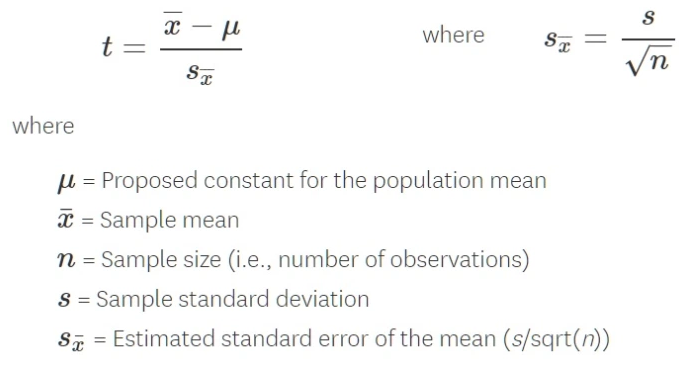

In [23]:
## TODO: Calculate the population mean of the "Year" column.
mean_year = d1['Year'].mean()
print(f"Population mean of the 'Year' column: {mean_year}")


Population mean of the 'Year' column: 2012.879518072289


In [24]:
# let's take sample from data

sample=np.random.choice(d1["Year"],50)

In [25]:
sample

array([2019, 2018, 2017, 2006, 2015, 2015, 2020, 2009, 2014, 2014, 2020,
       2010, 2006, 2003, 2022, 2007, 2016, 2017, 2013, 2010, 2010, 2011,
       2010, 2018, 2011, 2014, 2011, 2012, 2013, 2006, 2022, 2014, 2019,
       2013, 2023, 2010, 2005, 2016, 2014, 2006, 2009, 2012, 2008, 2009,
       2022, 2013, 2003, 2005, 2003, 2010])

In [27]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
ttest,p_value=ttest_1samp(sample,mean_year)


In [28]:
ttest

np.float64(-0.5525248143148935)

In [29]:
sample.mean()

np.float64(2012.46)

In [ ]:
## TODO: Perform hypothesis testing based on the p-value.

# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

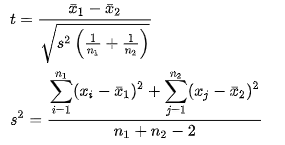

In [30]:
## TODO: Randomly select a sample of 50 from the "Flt" column.
# Randomly select 50 samples from the "Flt" column
sample_flt = d1['Flt'].sample(n=50, random_state=42)  # random_state for reproducibility

# Display the sample
print(sample_flt)


137    778423
6      894576
97     687145
60     864080
112    795525
180    723111
196    815270
183    767348
9      872580
104    768040
199    848650
215    467620
201    805988
239    663948
67     898759
223    712664
193    673087
15     878354
162    809770
24     872141
246    764677
19     951311
114    833647
68     788085
175    810895
45     891323
55     949167
10     819659
30     961902
120    730667
200    769351
33     892282
140    727898
159    746635
25     820306
111    775919
18     940939
195    781801
173    795324
158    771996
118    731077
96     749578
108    745717
184    797342
190    742649
16     895946
194    806233
69     819535
172    779642
38     894057
Name: Flt, dtype: int64


In [31]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.
# Randomly select 50 samples from the "Dom_Pax" column
sample_dom_pax = d1['Dom_Pax'].sample(n=50, random_state=42)

# Display the sample
print(sample_dom_pax)


137    59261855
6      55810773
97     43657818
60     50245100
112    55749349
180    55829992
196    71363514
183    64556900
9      49944931
104    50982170
199    72715566
215    27263462
201    69922300
239    62482296
67     58966473
223    60630994
193    55679100
15     53253194
162    66134540
24     47977657
246    75378157
19     57380873
114    59688267
68     47680001
175    66663503
45     55088983
55     62657667
10     47059495
30     62396446
120    47816859
200    63979337
33     53738093
140    52529329
159    58893676
25     47074882
111    53691455
18     59614287
195    66938177
173    66746003
158    61592900
118    51844482
96     46304921
108    47080430
184    67844134
190    64659493
16     53030873
194    70233456
69     52956023
172    64442559
38     58286011
Name: Dom_Pax, dtype: int64


In [34]:
from scipy.stats import ttest_ind

# Step 1: Randomly sample 50 values from each column
sample_a = d1['Dom_Pax'].sample(n=50, random_state=42)
sample_b = d1['Int_Pax'].sample(n=50, random_state=42)

# Step 2: Perform the independent t-test
t_stat, p_value = ttest_ind(sample_a, sample_b)

# Step 3: Print results
print("Independent t-test between 'Dom_Pax' and 'Int_Pax' samples:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


Independent t-test between 'Dom_Pax' and 'Int_Pax' samples:
t-statistic: 38.3376
p-value: 0.0000


In [35]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 8.321525419973343e-61


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)